## Imports

In [80]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## Cargamos el dataframe

El dataset proporciona información detallada sobre las compras realizadas por varios clientes, incluyendo datos demográficos del consumidor, detalles del producto comprado y el monto de la compra.
El objetivo de este análisis es explorar y entender mejor las características de los consumidores y los patrones de compra.

In [81]:
df = pd.read_csv('train.csv')

## Análisis del dataset

In [82]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [83]:
df.shape

(550068, 12)

Consultamos los tipos de datos, donde vemos que si hay muchos valores nulos en dos de las columnas y columnas categóricas

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [84]:
cats = list(df.select_dtypes(include=['object']).columns) #columnas categóricas
nums = list(df.select_dtypes(exclude=['object']).columns) #columnas numéricas
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
Variables numéricas: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Número de diferentes valores en cada columna

In [85]:

df.nunique(axis=0)

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Información estadística 

In [86]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Duplicados

Buscamos duplicados, aunque en este caso no hay

In [87]:
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 0


## Valores null

Comprobamos los valores null, hay dos columnas que tienen bastantes

In [88]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Porcentaje de valores null de la columnas Product_Category_2

In [89]:
df['Product_Category_2'].isnull().sum()

print((173638/550068)*100)

31.56664266963357


Porcentaje de valores null de la columna Product_Category_3

In [90]:
df['Product_Category_3'].isnull().sum()

print((383247/550068)*100)

69.67265865311198


Vamos a intentar analizar que relación tienen

In [91]:
df[['Product_Category_2', 'Product_Category_3']].head()

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN


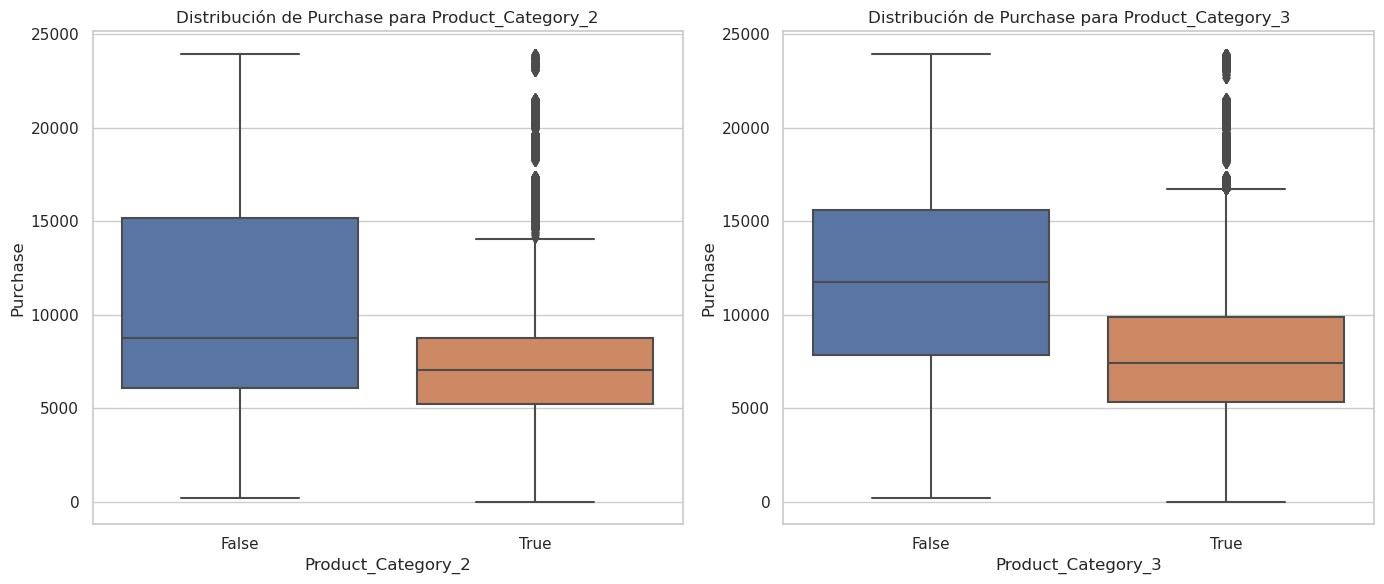

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Product_Category_2'].isnull(), y=df['Purchase'])
plt.title('Distribución de Purchase para Product_Category_2')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Product_Category_3'].isnull(), y=df['Purchase'])
plt.title('Distribución de Purchase para Product_Category_3')

plt.tight_layout()
plt.show()


Conclusión, los productos que suelen estar en estas categorías, suelen tener un valor de monto más elevado. 
Conservamos las filas rellenandolas con 0 los valores null para indicar que no pertencen a esa categoría

In [93]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

/tmp/ipykernel_37115/2691167354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0, inplace=True)
/tmp/ipykernel_37115/2691167354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

### Outliers

In [94]:
df_num= df[nums]

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

for col in nums:
    outliers = tukey_outliers(df_num[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* User_ID doesn't have any tukey outliers.

* Occupation doesn't have any tukey outliers.

* Marital_Status doesn't have any tukey outliers.

* Product_Category_1 has these tukey outliers,
545915    20
545916    20
545917    20
545918    20
545919    20
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 4153, dtype: int64

* Product_Category_2 doesn't have any tukey outliers.

* Product_Category_3 doesn't have any tukey outliers.

* Purchase has these tukey outliers,
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64



Vemos un outlier en la categoría uno, que se puede deber a un tipo de producto muy específico o de edición limitada.   

Otro outlier en purchases que se puede deber a una compra de un producto muy caro

## Numéricas

In [95]:
print(f'numerical variables:  {nums}')

numerical variables:  ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Text(0.5, 1.0, 'Marital_Status')

<Figure size 640x480 with 0 Axes>

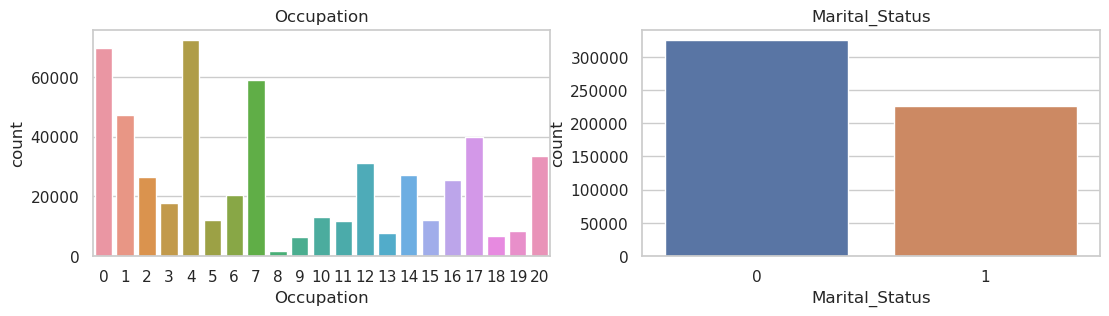

In [121]:
plt.figure(1)
plt.figure(figsize=(13,10))


plt.subplot(321)
sns.countplot(data=df_num, x='Occupation')
plt.title('Occupation')

plt.subplot(322)
sns.countplot(data=df_num, x='Marital_Status')
plt.title('Marital_Status')


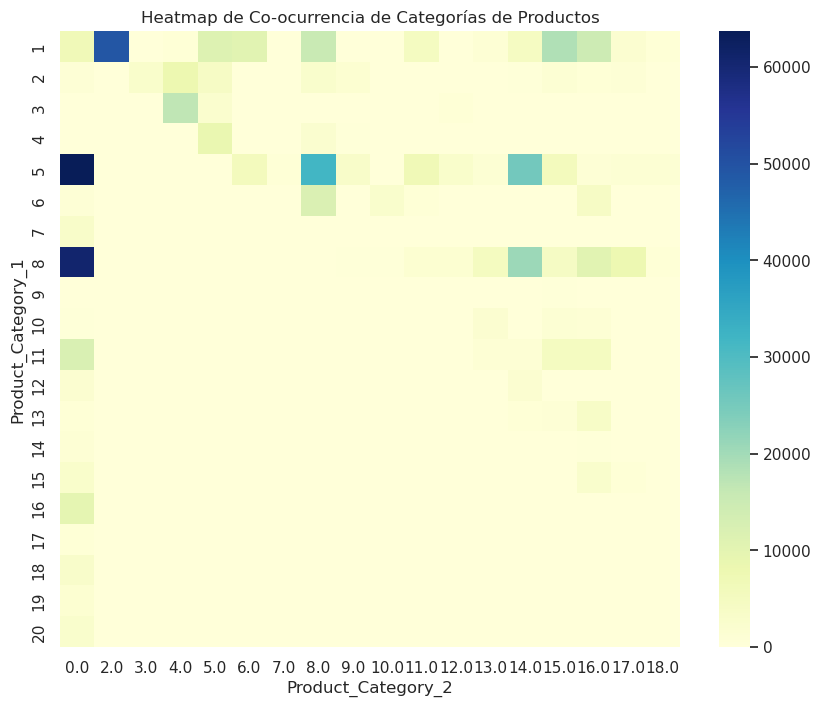

In [124]:
co_occurrence = df.groupby(['Product_Category_1', 'Product_Category_2']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap="YlGnBu")
plt.title('Co-ocurrencia de Categorías de Productos')
plt.show()

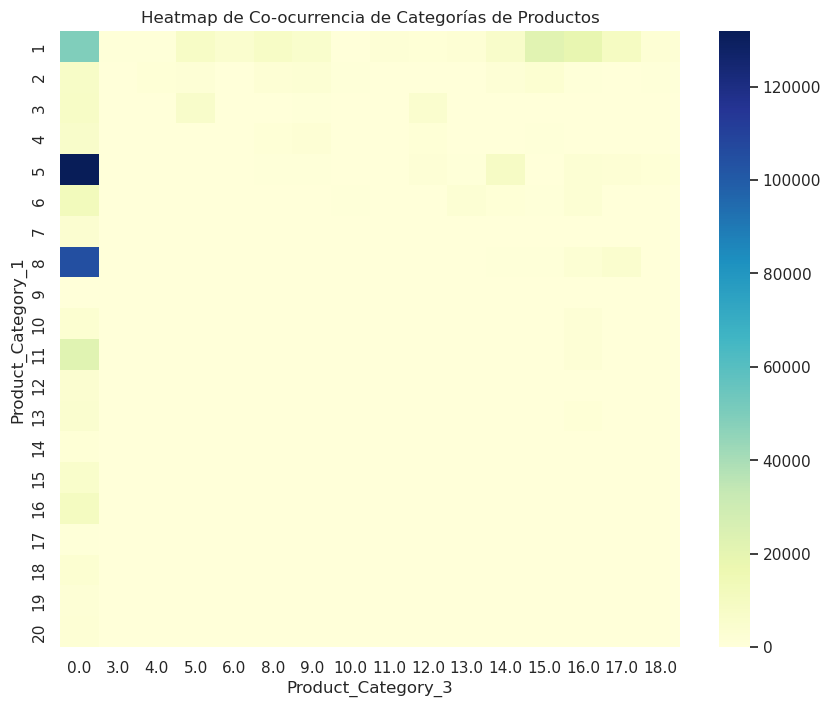

In [125]:
co_occurrence = df.groupby(['Product_Category_1', 'Product_Category_3']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap="YlGnBu")
plt.title('Co-ocurrencia de Categorías de Productos')
plt.show()

## Categóricas

Analizamos que columnas categóricas tenemos

In [99]:
print(f'categorical variables: {cats}')

categorical variables: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [100]:
df_cat= df[cats]
df_cat.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [101]:
for col in ['Product_ID', 'Gender', 'Age', 'City_Category',  'Stay_In_Current_City_Years' ]:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

/tmp/ipykernel_37115/813571391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))


In [102]:
df_cat['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [103]:
df_cat['Age'] = df_cat['Age'].map({'0-17':'Niño','18-25':'Joven','26-35':'Adulto','36-45':'Adulto','46-50':'Adulto','51-55':'Mayor','55+':'Mayor'})

/tmp/ipykernel_37115/3041119684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Age'] = df_cat['Age'].map({'0-17':'Niño','18-25':'Joven','26-35':'Adulto','36-45':'Adulto','46-50':'Adulto','51-55':'Mayor','55+':'Mayor'})


In [104]:
print(f"Categorías en Edad: {pd.unique(df_cat['Age'])}")


Categorías en Edad: ['Niño' 'Mayor' 'Adulto' 'Joven']


In [105]:
df_cat['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [106]:
df_cat['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [107]:
df_cat.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,Niño,A,2
1,P00248942,F,Niño,A,2
2,P00087842,F,Niño,A,2
3,P00085442,F,Niño,A,2
4,P00285442,M,Mayor,C,4+


<Figure size 640x480 with 0 Axes>

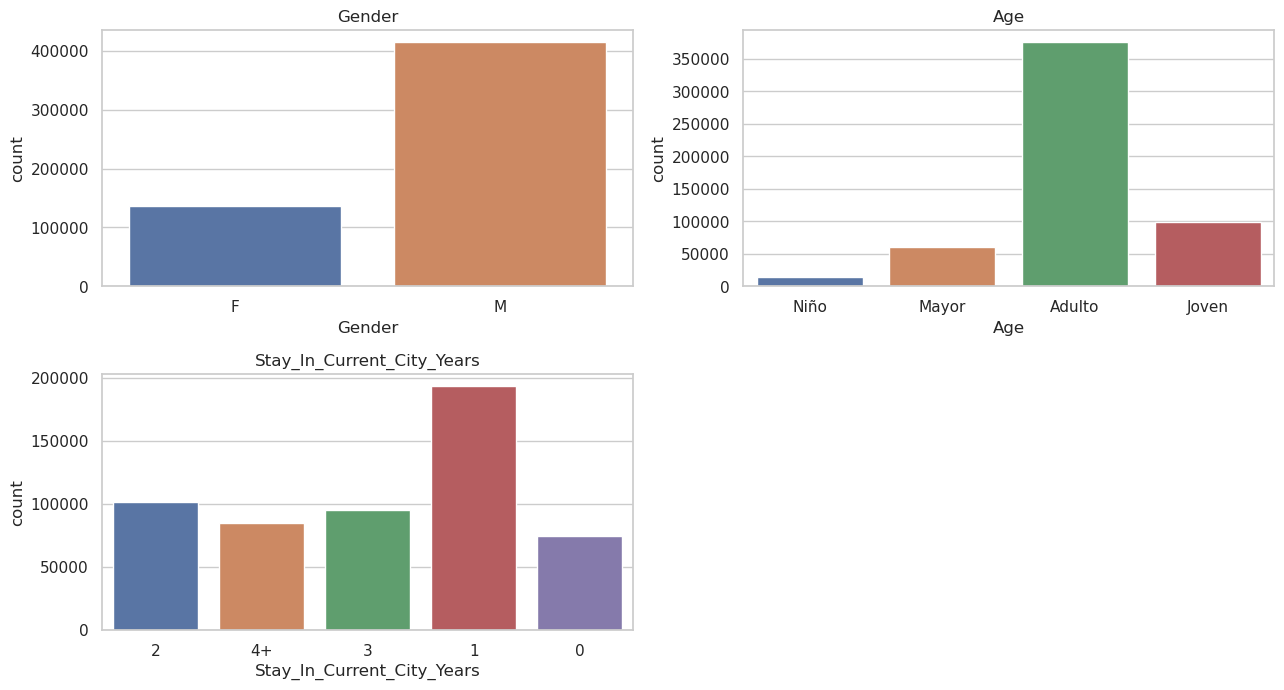

In [117]:
plt.figure(1)
plt.figure(figsize=(13,10))


plt.subplot(321)
sns.countplot(data=df_cat, x='Gender')
plt.title('Gender')


plt.subplot(322)
sns.countplot(data=df_cat, x='Age')
plt.title('Age')

plt.subplot(323)
sns.countplot(data=df_cat, x='Stay_In_Current_City_Years')
plt.title('Stay_In_Current_City_Years')


plt.tight_layout()


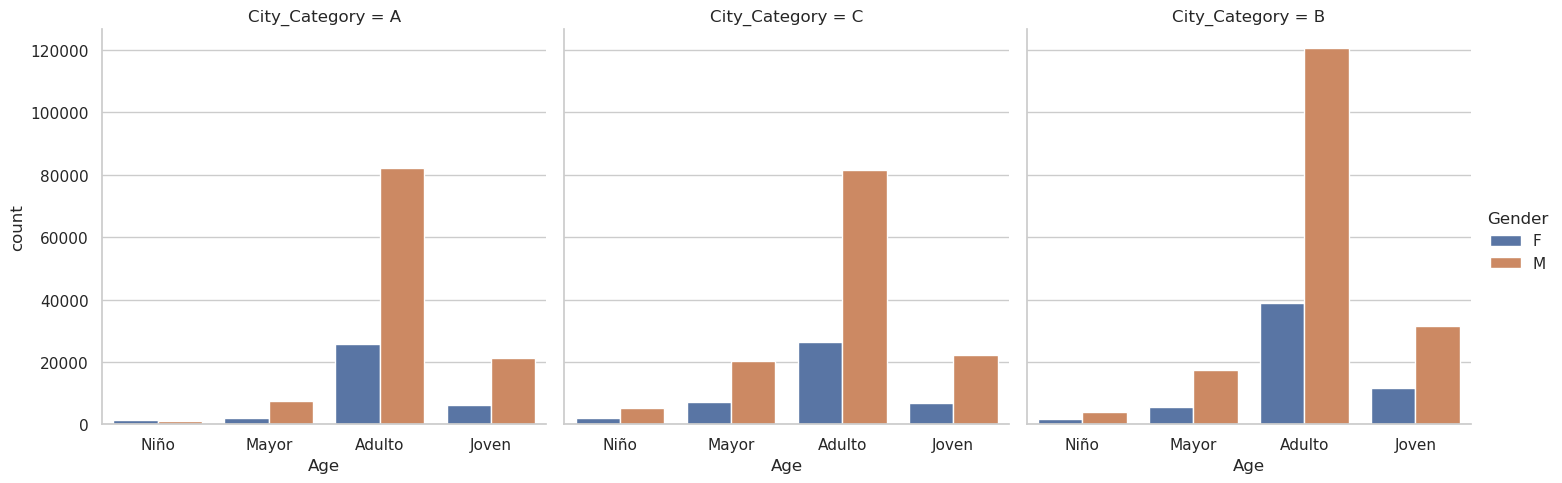

In [108]:
sns.catplot(x='Age', hue='Gender', col='City_Category', data=df_cat, kind='count')
plt.show()

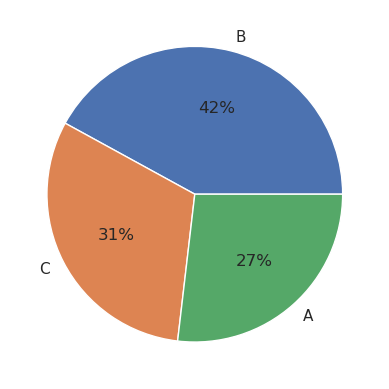

In [109]:
df1 = df_cat.City_Category.value_counts()
plt.pie(df1,labels=df1.index,autopct='%.0f%%')
plt.show()

## Análisis categórico y numérico

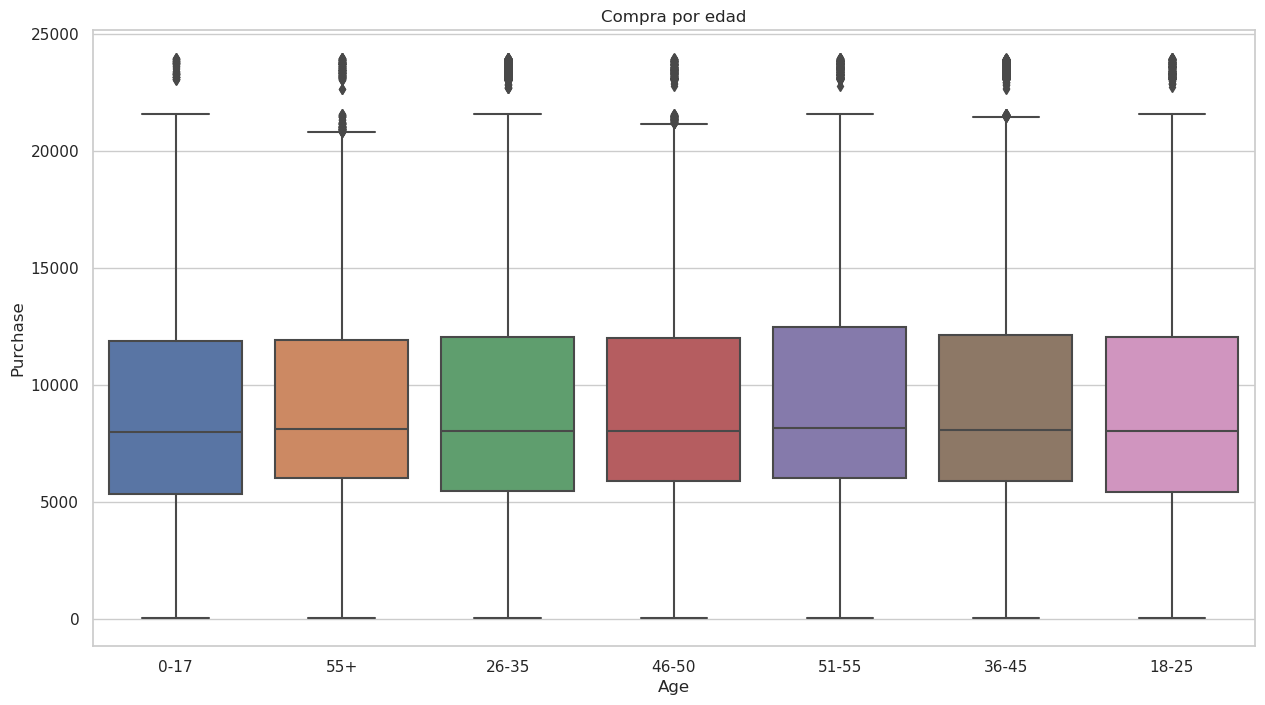

In [110]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Compra por edad')
plt.show()

Vemos que hay mucha consistencia en la median.   
Hay valores atípicos en todos los rangos de edad. 


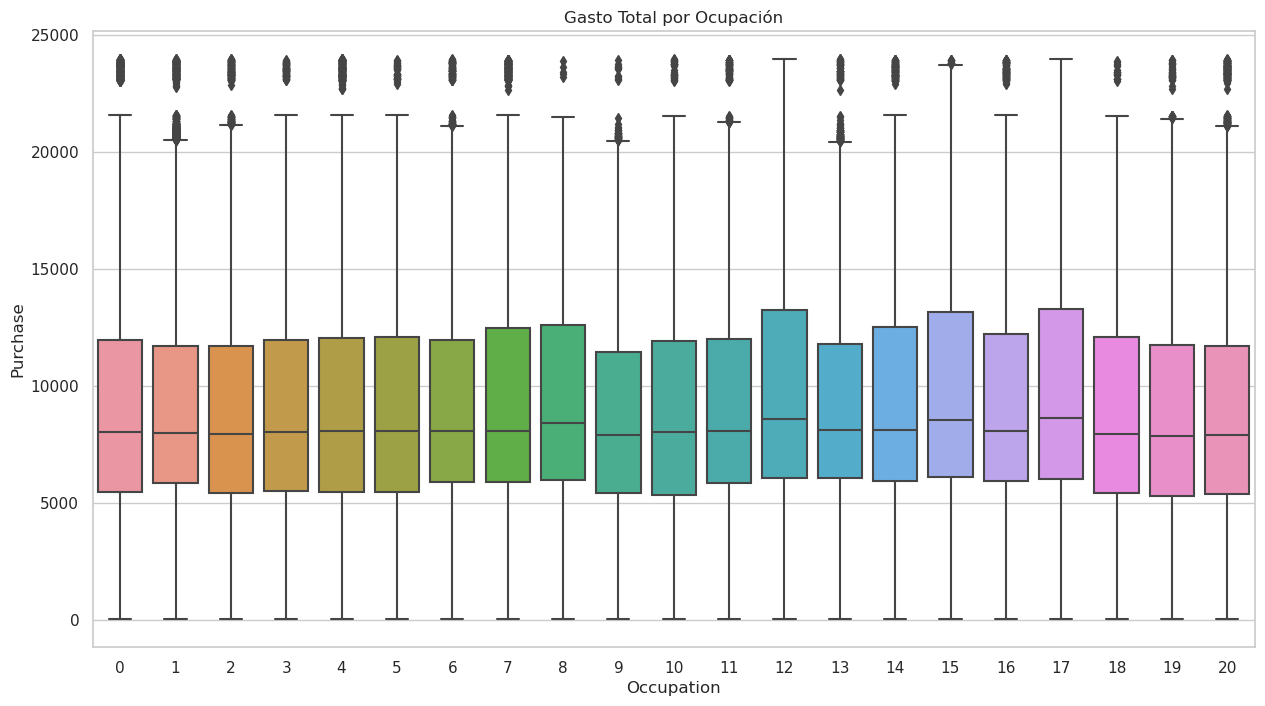

In [111]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.title('Gasto Total por Ocupación')
plt.show()

Parece que la ocupación por si solo no es un fuerte indicador del monto de gasto.   
Hay bastantes outliers.  
Las medias de las compras son bastante parecidas.    
No se aprecian patrones claros de gastos por ocupación. 

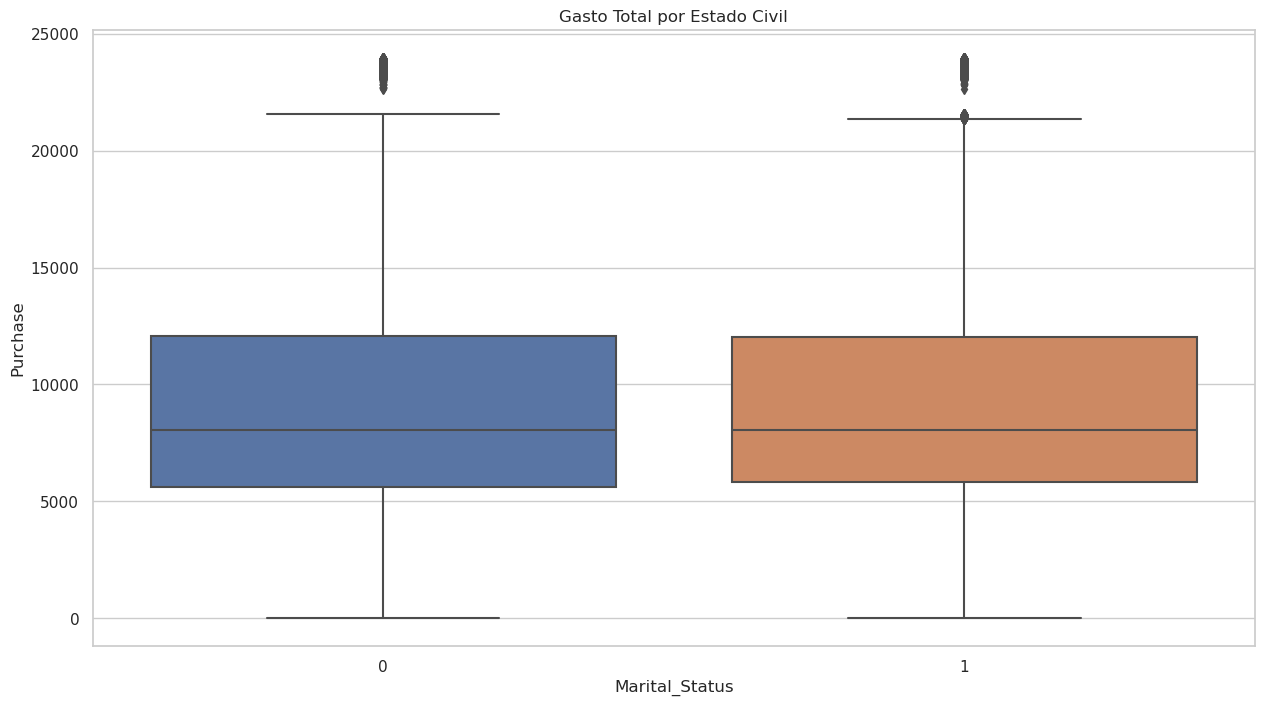

In [112]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Gasto Total por Estado Civil')
plt.show()

Patrones de compra similares

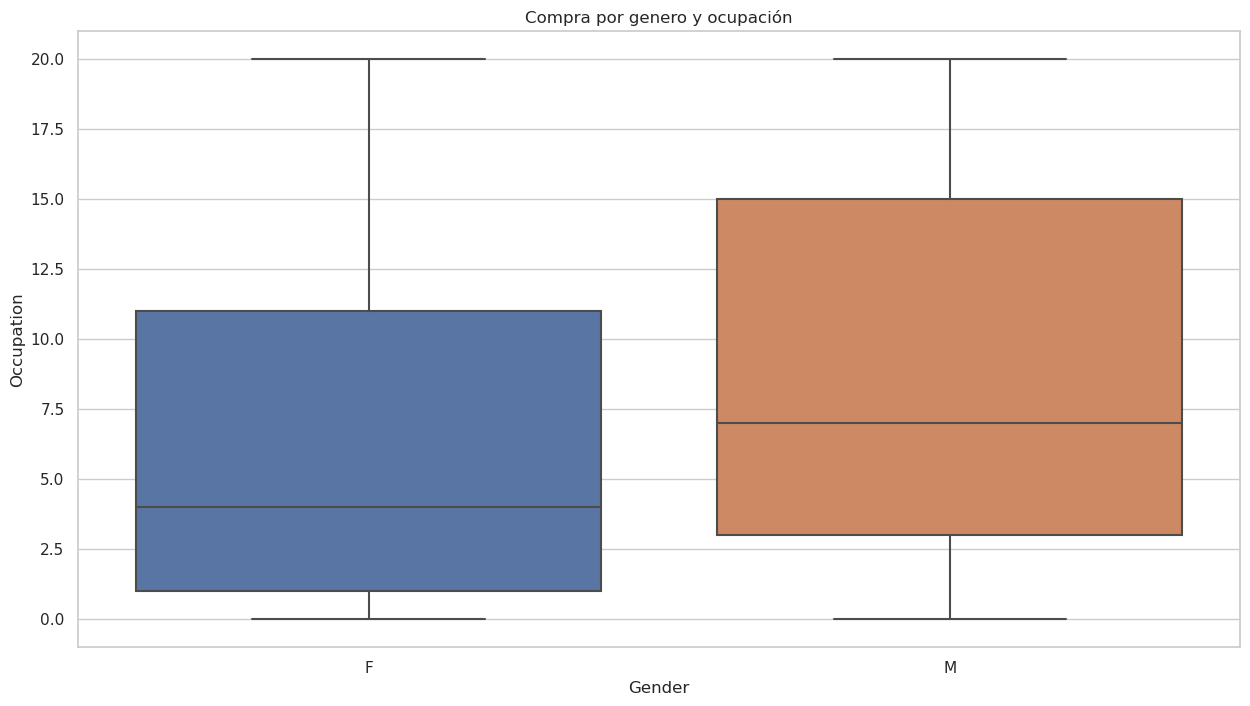

In [115]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Gender', y='Occupation', data=df)
plt.title('Compra por genero y ocupación')
plt.show()

/tmp/ipykernel_37115/2728143295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0, inplace=True)
/tmp/ipykernel_37115/2728143295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

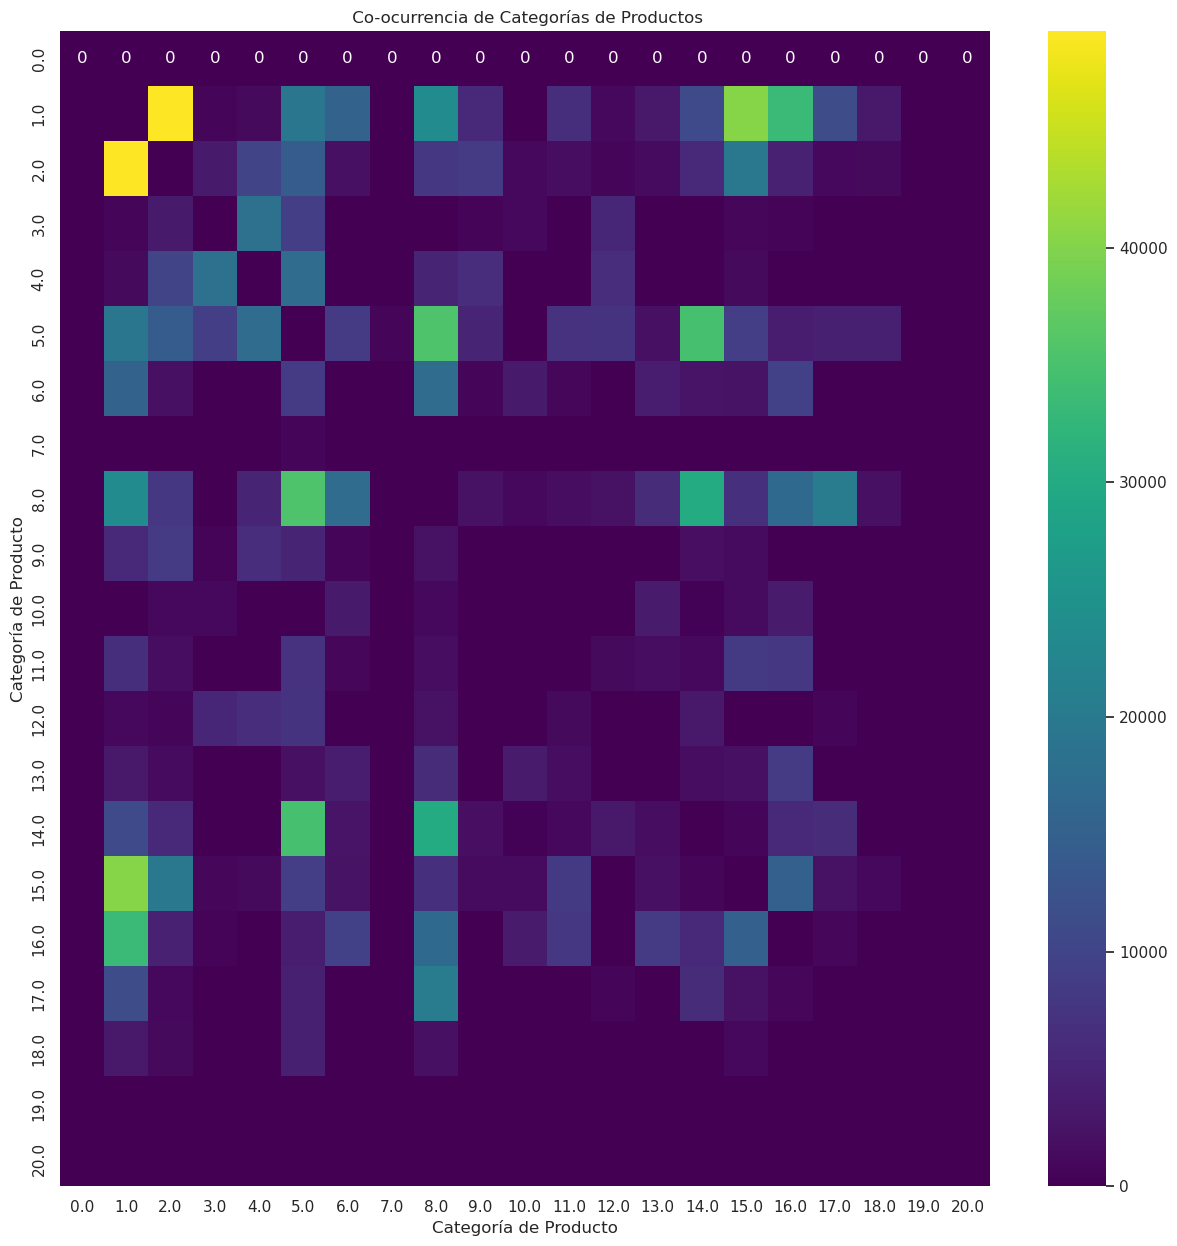

In [127]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
df['Combined_Categories'] = df[categories].values.tolist()

unique_categories = np.unique(df[categories].values)
co_occurrence_matrix = pd.DataFrame(data=np.zeros((len(unique_categories), len(unique_categories))),
                                    index=unique_categories, columns=unique_categories)

for index, row in df.iterrows():
    products = row['Combined_Categories']
    for i in products:
        if i == 0:
            continue
        for j in products:
            if j == 0 or i == j:
                continue
            co_occurrence_matrix.at[i, j] += 1


plt.figure(figsize=(15, 15))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='g', cmap='viridis')
plt.title(' Co-ocurrencia de Categorías de Productos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Categoría de Producto')
plt.show()

## Conclusión

La mayoría de las compras las hacen los adultos.   
La ciudad a la que perteneces influye.   
Los hombres parecen comprar más que las mujeres independientemente de la edad.   
Hay productos que siempre se suelen comprar de manera individual y otros que es común comprarlos juntos. 